In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df1 = pd.read_csv("point_landslide_newfactors_Regression.csv")
df2 = pd.read_csv("point_no-landslide_newfactors_Regression.csv")
dfR=pd.concat([df1,df2],axis=0,ignore_index=True)
dfR1=dfR.dropna()
dfR1 = dfR1.reset_index(drop=True)
Geol=pd.get_dummies(dfR1['nakhon_geology'],drop_first=True)
dfR2=pd.concat([dfR1,Geol],axis=1)
X=dfR2.drop("S/N", axis=1).astype(float)
y=dfR2['S/N'].astype(float)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X1_train=X_train.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])
X1_test=X_test.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])
X11=X.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])

In [4]:
Dfxtrain=pd.DataFrame(X_train.loc[:,["x","y"]])
Dfxtrain.to_excel("X_train_new.xlsx")

In [5]:
Dfxtest=pd.DataFrame(X_test.loc[:,["x","y"]])
Dfxtest.to_excel("X_test_new.xlsx")

In [6]:
X1_train.columns = X1_train.columns.astype(str)
X1_test.columns = X1_test.columns.astype(str)
X11.columns = X11.columns.astype(str)

In [7]:
log_model=LogisticRegression()
log_model.fit(X1_train.values, y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, X11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores:  [0.93389199 0.9283054  0.93575419 0.94599628 0.92364991 0.93668529
 0.92730662 0.94128611 0.94780988 0.93476235]
Average CV Score:  0.9355448012065235
SD CV Score:  0.007477177237655977
Number of CV Scores used in Average:  10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
PredictionsTe=log_model.predict(X1_test.values)
from sklearn.metrics import classification_report
print(classification_report(y_test,PredictionsTe))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       818
         1.0       0.95      0.96      0.95      2403

    accuracy                           0.93      3221
   macro avg       0.91      0.90      0.91      3221
weighted avg       0.93      0.93      0.93      3221



In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,PredictionsTe)

array([[ 699,  119],
       [ 108, 2295]])

In [11]:
PredictionsTr=log_model.predict(X1_train.values)
from sklearn.metrics import classification_report
print(classification_report(y_train,PredictionsTr))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1913
         1.0       0.96      0.96      0.96      5602

    accuracy                           0.94      7515
   macro avg       0.92      0.92      0.92      7515
weighted avg       0.94      0.94      0.94      7515



In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,PredictionsTr)

array([[1665,  248],
       [ 216, 5386]])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,PredictionsTe)

0.9295249922384353

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,PredictionsTr)

0.9382568196939455

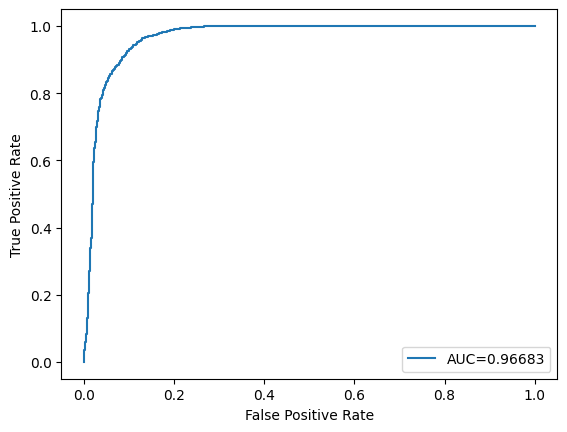

In [15]:
#train ROC
from sklearn import metrics
y_pred_probaTr = log_model.predict_proba(X1_train.values)[::,1]
fprTr, tprTr, _ = metrics.roc_curve(y_train.values,  y_pred_probaTr)
aucTr = metrics.roc_auc_score(y_train, y_pred_probaTr)
plt.plot(fprTr,tprTr,label="AUC="+str("%.5f" %aucTr))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

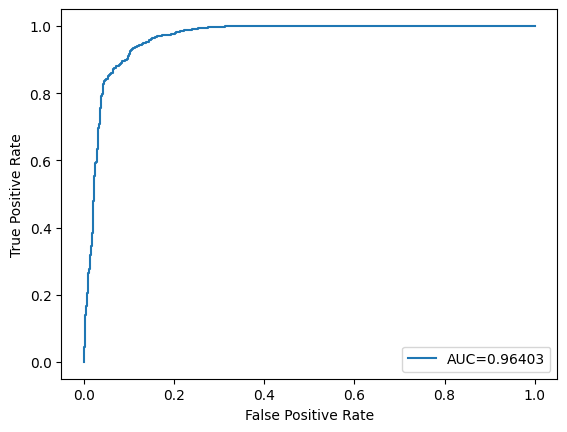

In [16]:
from sklearn import metrics
y_pred_proba = log_model.predict_proba(X1_test.values)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.values,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str("%.5f" %auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
proba = log_model.predict_proba(X11.values)[:,1]
d=pd.DataFrame(proba)
DR1=pd.DataFrame(X.loc[:,["x","y"]])
DR=pd.concat([DR1,d],axis=1)
DR.to_excel("XYandProba_logistic_new.xlsx")

In [18]:
#SVM
dfSVM1 = pd.read_csv("point_landslide_newfactors_Regression.csv")
dfSVM2 = pd.read_csv("point_no-landslide_newfactors_Regression.csv")
dfSVM=pd.concat([dfSVM1,dfSVM2],axis=0,ignore_index=True)
dfS1=dfSVM.dropna()
dfS1 = dfS1.reset_index(drop=True)
dfS2=pd.concat([dfS1,Geol],axis=1)
Xs=dfS2.drop("S/N", axis=1).astype(float)
ys=dfS2['S/N'].astype(float)

In [19]:
Xs.columns = Xs.columns.astype(str)

In [20]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=4)
Xs1_train=Xs_train.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])
Xs1_test=Xs_test.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])
Xs11=Xs.drop(columns =['x','y','nakhon_geology','rainfall_intensity','Aspect_nakhon','NDWI_combine'])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xs11=scaler.fit_transform(Xs11)
Xs1_train = scaler.fit_transform(Xs1_train)
Xs1_test = scaler.fit_transform(Xs1_test)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.5,1,2,5],
              'kernel': ['linear']
              }
cl = svm.SVC()
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [22]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95344507 0.95903166 0.95530726 0.94506518 0.93761639 0.94134078
 0.93755825 0.93755825 0.95433364 0.94687791]
Average CV Score:  0.9468134383661256
SD CV Score:  0.007815851083991982
Number of CV Scores used in Average:  10


In [23]:
clf = svm.SVC(kernel='linear', C=1)

#Train the model using the training sets
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_predTe = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_predTe))
print(classification_report(ys_test, ys_predTe))
accuracy_score(ys_test, ys_predTe)

[[ 670  148]
 [  34 2369]]
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       818
         1.0       0.94      0.99      0.96      2403

    accuracy                           0.94      3221
   macro avg       0.95      0.90      0.92      3221
weighted avg       0.94      0.94      0.94      3221



0.943495808755045

In [24]:
#Train
clf = svm.SVC(kernel='linear', C=1)

#Train the model using the training sets
clf.fit(Xs1_train, ys_train)

#Predict the response for train dataset
ys_predTr = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_predTr))
print(classification_report(ys_train, ys_predTr))
accuracy_score(ys_train, ys_predTr)

[[1603  310]
 [  59 5543]]
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      1913
         1.0       0.95      0.99      0.97      5602

    accuracy                           0.95      7515
   macro avg       0.96      0.91      0.93      7515
weighted avg       0.95      0.95      0.95      7515



0.9508982035928144

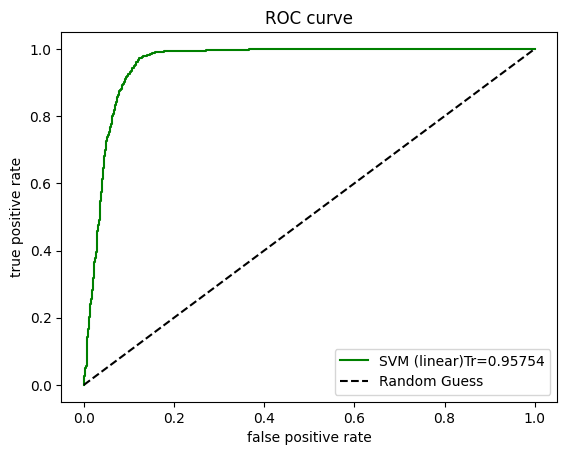

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

modelL = SVC(kernel="linear", C=1)
modelL.fit(Xs1_train, ys_train)

decision_scoresTr = modelL.decision_function(Xs1_train)
decision_scores1 = modelL.decision_function(Xs11)
fpr2Tr, tpr2Tr, thres1 = roc_curve(ys_train, decision_scoresTr)
aucsvmlTr = metrics.roc_auc_score(ys_train, decision_scoresTr)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr2Tr, tpr2Tr, "g", label='SVM (linear)Tr='+str("%.5f" %aucsvmlTr))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

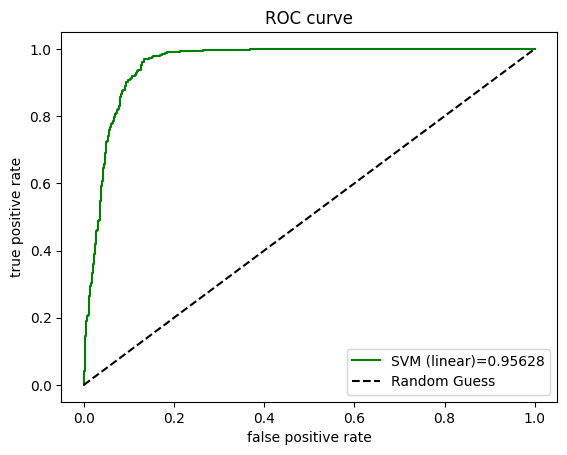

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

modelL = SVC(kernel="linear", C=1)
modelL.fit(Xs1_train, ys_train)

decision_scores = modelL.decision_function(Xs1_test)
decision_scores1 = modelL.decision_function(Xs11)
fpr2, tpr2, thres = roc_curve(ys_test, decision_scores)
aucsvml = metrics.roc_auc_score(ys_test, decision_scores)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr2, tpr2, "g", label='SVM (linear)='+str("%.5f" %aucsvml))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [27]:
from sklearn.calibration import CalibratedClassifierCV
# Create a calibrated classifier using Platt Scaling
calibrated_clfL = CalibratedClassifierCV(modelL, method='sigmoid')
calibrated_clfL.fit(Xs1_train, ys_train)

# Make predictions on the data set
ys_probaL = calibrated_clfL.predict_proba(Xs11)[:,1]
DS1=pd.DataFrame(Xs.loc[:,["x","y"]])
dsvml=pd.DataFrame(ys_probaL)
DS=pd.concat([DS1,dsvml],axis=1)
DS.to_excel("XYandProba_SVM_Linear_new.xlsx")

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [25,30],
              'gamma':[0.5,1],
              'kernel': ['rbf']
              }
cl = svm.SVC()
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 30, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=30, gamma=1)


In [28]:
from sklearn import svm
clf = svm.SVC(kernel="rbf",C=30,gamma=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95437616 0.95716946 0.96182495 0.95810056 0.94320298 0.95530726
 0.95246971 0.94780988 0.96458527 0.95153774]
Average CV Score:  0.954638398753213
SD CV Score:  0.006010080210758287
Number of CV Scores used in Average:  10


In [29]:
clf = svm.SVC(kernel="rbf",C=30,gamma=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_pred = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_pred))
print(classification_report(ys_test, ys_pred))
accuracy_score(ys_test, ys_pred)

[[ 705  113]
 [  46 2357]]
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       818
         1.0       0.95      0.98      0.97      2403

    accuracy                           0.95      3221
   macro avg       0.95      0.92      0.93      3221
weighted avg       0.95      0.95      0.95      3221



0.9506364483079789

In [30]:
clf = svm.SVC(kernel="rbf",C=30,gamma=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for train dataset
ys_predTr = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_predTr))
print(classification_report(ys_train, ys_predTr))
accuracy_score(ys_train, ys_predTr)

[[1681  232]
 [  61 5541]]
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1913
         1.0       0.96      0.99      0.97      5602

    accuracy                           0.96      7515
   macro avg       0.96      0.93      0.95      7515
weighted avg       0.96      0.96      0.96      7515



0.9610113107119095

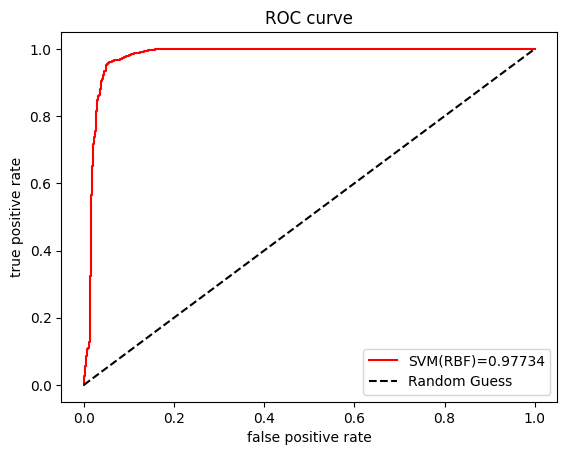

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

modelR = SVC(kernel="rbf", C=30, gamma=1)
modelR.fit(Xs1_train, ys_train)

decision_scores = modelR.decision_function(Xs1_train)
decision_scores1 = modelR.decision_function(Xs11)
fpr1Tr, tpr1Tr, thres = roc_curve(ys_train, decision_scores)
aucsvmRTr = metrics.roc_auc_score(ys_train, decision_scores)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr1Tr, tpr1Tr, "r", label='SVM(RBF)='+str("%.5f" %aucsvmRTr))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

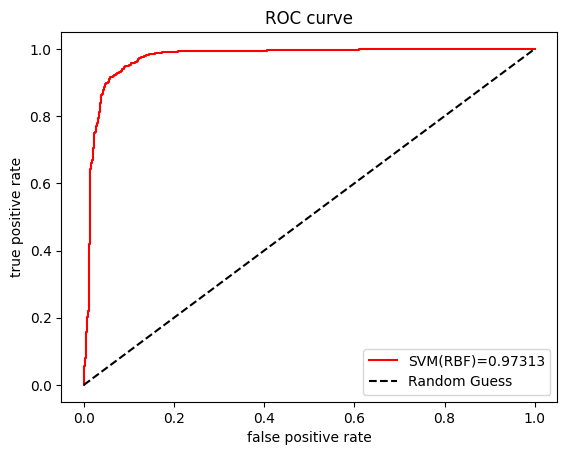

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

modelR = SVC(kernel="rbf", C=30, gamma=1)
modelR.fit(Xs1_train, ys_train)

decision_scores = modelR.decision_function(Xs1_test)
decision_scores1 = modelR.decision_function(Xs11)
fpr1, tpr1, thres = roc_curve(ys_test, decision_scores)
aucsvmR = metrics.roc_auc_score(ys_test, decision_scores)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr1, tpr1, "r", label='SVM(RBF)='+str("%.5f" %aucsvmR))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# Create a calibrated classifier using Platt Scaling
calibrated_clfR = CalibratedClassifierCV(modelR, method='sigmoid')
calibrated_clfR.fit(Xs1_train, ys_train)

# Make predictions on the data set
ys_probaR = calibrated_clfR.predict_proba(Xs11)[:,1]
DS1=pd.DataFrame(Xs.loc[:,["x","y"]])
dsvmR=pd.DataFrame(ys_probaR)
DSR=pd.concat([DS1,dsvmR],axis=1)
DSR.to_excel("XYandProba_SVM_RBF_new.xlsx")

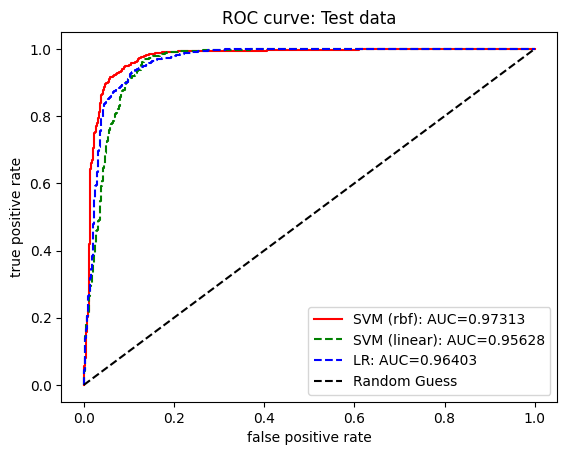

In [33]:
# roc curve
plt.plot(fpr1, tpr1, "r", label='SVM (rbf): AUC='+str("%.5f" %aucsvmR))
plt.plot(fpr2, tpr2, "g--", label='SVM (linear): AUC='+str("%.5f" %aucsvml))
plt.plot(fpr,tpr, "b--",label='LR: AUC='+str("%.5f" %auc))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve: Test data")
plt.show()

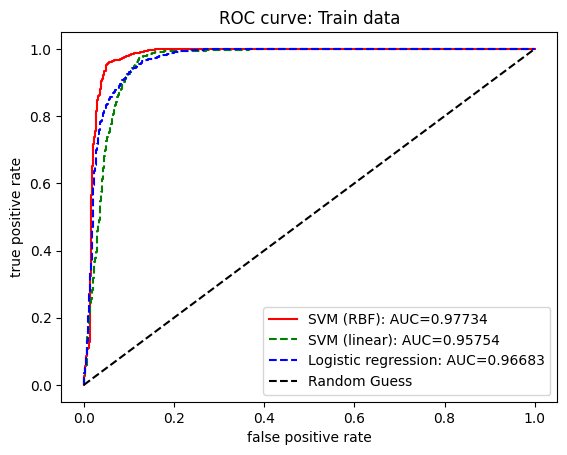

In [34]:
# roc curve
plt.plot(fpr1Tr, tpr1Tr, "r", label='SVM (RBF): AUC='+str("%.5f" %aucsvmRTr))
plt.plot(fpr2Tr, tpr2Tr, "g--", label='SVM (linear): AUC='+str("%.5f" %aucsvmlTr))
plt.plot(fprTr,tprTr, "b--",label='Logistic regression: AUC='+str("%.5f" %aucTr))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve: Train data")
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C': [40,50],
              'gamma':[0.5,1],
              }
cl = svm.SVC(kernel='poly', degree=2, coef0=1,)
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 40, 'gamma': 1}
SVC(C=40, coef0=1, degree=2, gamma=1, kernel='poly')


In [35]:
clf = svm.SVC(kernel="poly",C=40,degree=2,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_pred = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_pred))
print(classification_report(ys_test, ys_pred))
accuracy_score(ys_test, ys_pred)

[[ 711  107]
 [  51 2352]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       818
         1.0       0.96      0.98      0.97      2403

    accuracy                           0.95      3221
   macro avg       0.94      0.92      0.93      3221
weighted avg       0.95      0.95      0.95      3221



0.9509469108972369

In [36]:
clf = svm.SVC(kernel="poly",C=40,degree=2,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for Train dataset
ys_pred = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_pred))
print(classification_report(ys_train, ys_pred))
accuracy_score(ys_train, ys_pred)

[[1684  229]
 [  61 5541]]
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      1913
         1.0       0.96      0.99      0.97      5602

    accuracy                           0.96      7515
   macro avg       0.96      0.93      0.95      7515
weighted avg       0.96      0.96      0.96      7515



0.9614105123087159

In [37]:
clf = svm.SVC(kernel="poly",C=40,degree=2,gamma=1,coef0=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95437616 0.95996276 0.96368715 0.96089385 0.94227188 0.95437616
 0.94967381 0.94780988 0.96272134 0.94967381]
Average CV Score:  0.9545446814566445
SD CV Score:  0.006808794312956034
Number of CV Scores used in Average:  10


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C': [20,30],
              'gamma':[0.5,1],
              }
cl = svm.SVC(kernel='poly', degree=3, coef0=1,)
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 20, 'gamma': 1}
SVC(C=20, coef0=1, gamma=1, kernel='poly')


In [38]:
clf = svm.SVC(kernel="poly",C=20,degree=3,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_pred = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_pred))
print(classification_report(ys_test, ys_pred))
accuracy_score(ys_test, ys_pred)

[[ 695  123]
 [  45 2358]]
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       818
         1.0       0.95      0.98      0.97      2403

    accuracy                           0.95      3221
   macro avg       0.94      0.92      0.93      3221
weighted avg       0.95      0.95      0.95      3221



0.947842285004657

In [39]:
clf = svm.SVC(kernel="poly",C=20,degree=3,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for Train dataset
ys_pred = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_pred))
print(classification_report(ys_train, ys_pred))
accuracy_score(ys_train, ys_pred)

[[1693  220]
 [  41 5561]]
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1913
         1.0       0.96      0.99      0.98      5602

    accuracy                           0.97      7515
   macro avg       0.97      0.94      0.95      7515
weighted avg       0.97      0.97      0.96      7515



0.9652694610778443

In [40]:
clf = svm.SVC(kernel="poly",C=20,degree=3,gamma=1,coef0=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96275605 0.96089385 0.96275605 0.95996276 0.94599628 0.95716946
 0.95246971 0.95060578 0.96458527 0.95526561]
Average CV Score:  0.9572460825302282
SD CV Score:  0.005767698803775107
Number of CV Scores used in Average:  10


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C': [20,30],
              'gamma':[0.5,1],
              'degree':[4]
              }
cl = svm.SVC(kernel='poly', coef0=1,)
grid = GridSearchCV(cl, parameters, cv=5)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 20, 'degree': 4, 'gamma': 1}
SVC(C=20, coef0=1, degree=4, gamma=1, kernel='poly')


In [41]:
clf = svm.SVC(kernel="poly",C=20,degree=4,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_pred = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_pred))
print(classification_report(ys_test, ys_pred))
accuracy_score(ys_test, ys_pred)

[[ 702  116]
 [  57 2346]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       818
         1.0       0.95      0.98      0.96      2403

    accuracy                           0.95      3221
   macro avg       0.94      0.92      0.93      3221
weighted avg       0.95      0.95      0.95      3221



0.946289972058367

In [42]:
clf = svm.SVC(kernel="poly",C=20,degree=4,gamma=1,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for Train dataset
ys_pred = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_pred))
print(classification_report(ys_train, ys_pred))
accuracy_score(ys_train, ys_pred)

[[1720  193]
 [  30 5572]]
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      1913
         1.0       0.97      0.99      0.98      5602

    accuracy                           0.97      7515
   macro avg       0.97      0.95      0.96      7515
weighted avg       0.97      0.97      0.97      7515



0.9703260146373919

In [ ]:
clf = svm.SVC(kernel="poly",C=20,degree=4,gamma=1,coef0=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95903166 0.95996276 0.95903166 0.95903166 0.94878957 0.95716946
 0.95153774 0.95060578 0.96644921 0.95619758]
Average CV Score:  0.9567807067325464
SD CV Score:  0.004987719820680585
Number of CV Scores used in Average:  10


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C': [10,20,30],
              'gamma':[0.5,1],
              'degree':[1]
              }
cl = svm.SVC(kernel='poly', coef0=1,)
grid = GridSearchCV(cl, parameters, cv=5)
grid.fit(Xs1_train, ys_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'degree': 1, 'gamma': 0.5}
SVC(C=10, coef0=1, degree=1, gamma=0.5, kernel='poly')


In [ ]:
clf = svm.SVC(kernel="poly",C=10,degree=1,gamma=0.5,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for test dataset
ys_pred = clf.predict(Xs1_test)
print(confusion_matrix(ys_test,ys_pred))
print(classification_report(ys_test, ys_pred))
accuracy_score(ys_test, ys_pred)

[[ 670  148]
 [  34 2369]]
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       818
         1.0       0.94      0.99      0.96      2403

    accuracy                           0.94      3221
   macro avg       0.95      0.90      0.92      3221
weighted avg       0.94      0.94      0.94      3221



0.943495808755045

In [ ]:
clf = svm.SVC(kernel="poly",C=10,degree=1,gamma=0.5,coef0=1)
clf.fit(Xs1_train, ys_train)

#Predict the response for Train dataset
ys_pred = clf.predict(Xs1_train)
print(confusion_matrix(ys_train,ys_pred))
print(classification_report(ys_train, ys_pred))
accuracy_score(ys_train, ys_pred)

[[1603  310]
 [  59 5543]]
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      1913
         1.0       0.95      0.99      0.97      5602

    accuracy                           0.95      7515
   macro avg       0.96      0.91      0.93      7515
weighted avg       0.95      0.95      0.95      7515



0.9508982035928144

In [ ]:
clf = svm.SVC(kernel="poly",C=10,degree=1,gamma=0.5,coef0=1)
k_folds = KFold(n_splits = 10, random_state=10, shuffle=True)
scores = cross_val_score(clf, Xs11, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("SD CV Score: ", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95344507 0.95903166 0.95530726 0.94506518 0.93761639 0.94134078
 0.93755825 0.93755825 0.95433364 0.94687791]
Average CV Score:  0.9468134383661256
SD CV Score:  0.007815851083991982
Number of CV Scores used in Average:  10


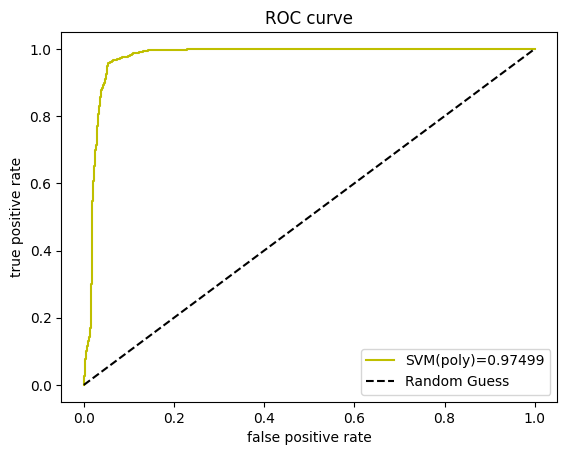

In [43]:
#poly train
modelP = SVC(kernel="poly",C=40,degree=2,gamma=1,coef0=1)
modelP.fit(Xs1_train, ys_train)

decision_scores = modelP.decision_function(Xs1_train)
decision_scores1 = modelP.decision_function(Xs11)
fpr1TrP, tpr1TrP, thres = roc_curve(ys_train, decision_scores)
aucsvmPTr = metrics.roc_auc_score(ys_train, decision_scores)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr1TrP, tpr1TrP, "y", label='SVM(poly)='+str("%.5f" %aucsvmPTr))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

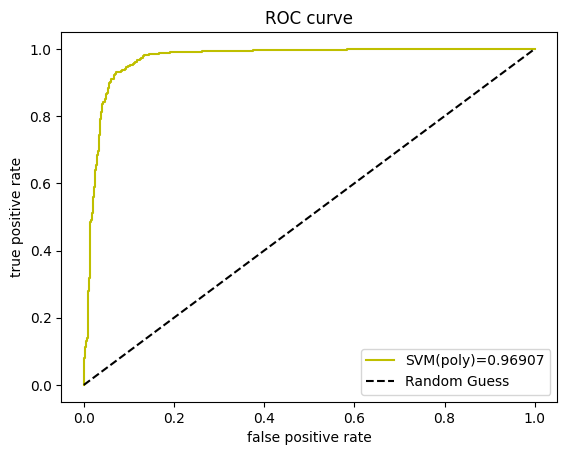

In [44]:
#Poly test
modelP = SVC(kernel="poly",C=40,degree=2,gamma=1,coef0=1)
modelP.fit(Xs1_train, ys_train)

decision_scores = modelP.decision_function(Xs1_test)
decision_scores1 = modelP.decision_function(Xs11)
fpr1p, tpr1p, thres = roc_curve(ys_test, decision_scores)
aucsvmP = metrics.roc_auc_score(ys_test, decision_scores)
#print('AUC: {:.8f}'.format(roc_auc_score(ys_test, decision_scores)))

# roc curve
plt.plot(fpr1p, tpr1p, "y", label='SVM(poly)='+str("%.5f" %aucsvmP))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

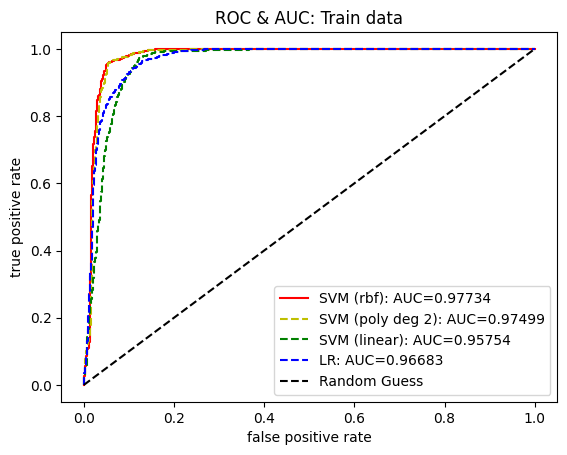

In [45]:
#ROC AUC Train
plt.plot(fpr1Tr, tpr1Tr, "r", label='SVM (rbf): AUC='+str("%.5f" %aucsvmRTr))
plt.plot(fpr1TrP, tpr1TrP, "y--", label='SVM (poly deg 2): AUC='+str("%.5f" %aucsvmPTr))
plt.plot(fpr2Tr, tpr2Tr, "g--", label='SVM (linear): AUC='+str("%.5f" %aucsvmlTr))
plt.plot(fprTr,tprTr, "b--",label='LR: AUC='+str("%.5f" %aucTr))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC & AUC: Train data")
plt.show()

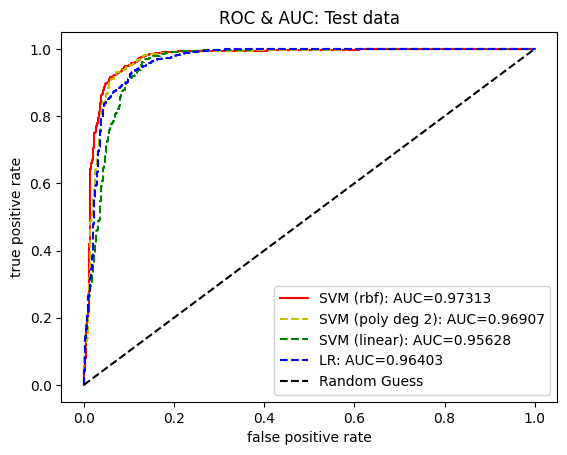

In [46]:
# roc curve test
plt.plot(fpr1, tpr1, "r", label='SVM (rbf): AUC='+str("%.5f" %aucsvmR))
plt.plot(fpr1p, tpr1p, "y--", label='SVM (poly deg 2): AUC='+str("%.5f" %aucsvmP))
plt.plot(fpr2, tpr2, "g--", label='SVM (linear): AUC='+str("%.5f" %aucsvml))
plt.plot(fpr,tpr, "b--",label='LR: AUC='+str("%.5f" %auc))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC & AUC: Test data")
plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# Create a calibrated classifier using Platt Scaling
calibrated_clfP = CalibratedClassifierCV(modelP, method='sigmoid')
calibrated_clfP.fit(Xs1_train, ys_train)

# Make predictions on the data set
ys_probaP = calibrated_clfP.predict_proba(Xs11)[:,1]
DS2=pd.DataFrame(Xs.loc[:,["x","y"]])
dsvmP=pd.DataFrame(ys_probaP)
DSP=pd.concat([DS2,dsvmP],axis=1)
DSP.to_excel("XYandProba_SVM_Poly_new.xlsx")